# Lead Scoring Case Study

### Problem Statement:-

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

### Step 1- Importing, Cleaning, Reading and Merging data

In [6]:
# Importing required librairies and modules

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

In [7]:
# Read the dataset

lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#shape of the dataset

lead.shape

(9240, 37)

In [9]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [10]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# As we observe that in the dataset many of the categorical variables have a level called 'Select' which needs to be handled
# So, for handing this problem
#replaced select value from Null or NAN

lead = lead.replace("Select", np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [13]:
# Calculating total percentage of Null values in the dataset

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see there are so many null values in our dataset which needs to be handle.
So let's start with null value handling.

In [14]:
# Drop the columns which have more than 70% null values

list_of_col = lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>70)].columns
lead = lead.drop(list_of_col,axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# Shape after dropping the columns

lead.shape

(9240, 35)

In [16]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# Now handle other columns which have high null vlaues but less than 70%

# Lead Quality

lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

As we can see, ther is a level 'Not Sure' which can safely replace the null or NAN value in this column

In [18]:
# replace the null values with "Not Sure" level in the Lead Quality column

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, "Not Sure")
#lead['Lead Quality'].value_counts()

In [19]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [20]:
lead['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [21]:
# Asymmetrique Activity Index

lead['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In "Asymmetrique Activity Index" column their is no  such level which can replace null values. So, the best solution for this column is to drop this column.

In [22]:
# Drop "Asymmetrique Activity Index" column

lead = lead.drop('Asymmetrique Activity Index',axis=1)


In [23]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
# Asymmetrique Profile Index

lead['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

Same as above column. We can drop this column because it also contain almost 45% null values.

In [25]:
# Drop "Asymmetrique Profile Index" column

lead = lead.drop('Asymmetrique Profile Index',axis=1)

In [26]:
# Asymmetrique Activity Score

lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

As "Asymmetrique Activity Score" column is a float datatype column, their is too much variation in the values. So, we can drop this column.  

In [27]:
# Drop "Asymmetrique Activity Score" column

lead = lead.drop('Asymmetrique Activity Score',axis=1)

In [28]:
# Asymmetrique Profile Score

lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

Same as above column, we can drop this column also

In [29]:
# Drop "Asymmetrique Profile Score" column

lead = lead.drop('Asymmetrique Profile Score',axis=1)

In [30]:
lead.shape

(9240, 31)

In [31]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [32]:
# City

lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

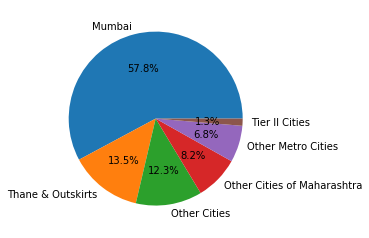

In [33]:
plt.pie(lead['City'].value_counts(),labels=['Mumbai','Thane & Outskirts','Other Cities','Other Cities of Maharashtra'
                                        ,'Other Metro Cities','Tier II Cities'],autopct='%1.1f%%')
plt.show()

As we can see the pie plot almost 57% values are Mumbai. So, it is relevant to replace null values with Mumbai.

In [34]:
# replace the null values with "Mumbai" level in the City column

lead['City'] = lead['City'].replace(np.nan, "Mumbai")
lead['City'].head()

0    Mumbai
1    Mumbai
2    Mumbai
3    Mumbai
4    Mumbai
Name: City, dtype: object

In [35]:
# Specialization

lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

As "Specialization" column gives us the detail about the skill domain of the customer, we can't drop this columns. So, we can replce the null value with 'Other Specialization' level of Specialization.

In [36]:
# replace the null values with "Other Specialization" level in the Specialization column

lead['Specialization'] = lead['Specialization'].replace(np.nan, "Other Specialization")

In [37]:
lead['Specialization'].value_counts()

Other Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [38]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [39]:
# Tags

lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In "Tags" column their is a level as "Will revert after reading the email". We can replace null value with this level.

In [40]:
# replace the null values with "Will revert after reading the email" level in the Tags column

lead['Tags'] = lead['Tags'].replace(np.nan, "Will revert after reading the email")

In [41]:
lead['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [42]:
# What matters most to you in choosing a course

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In "What matters most to you in choosing a course" every one choose 'Better Career Prospects' except 3 customers. So, we can safely replace null value with this level ('Better Career Prospects').

In [43]:
# replace the null values with "Better Career Prospects" level in the What matters most to you in choosing a course column

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, "Better Career Prospects")

In [44]:
# What is your current occupation

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

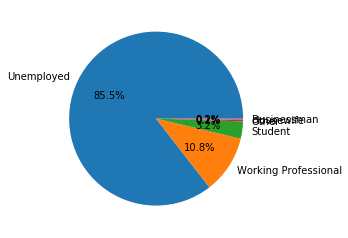

In [45]:
plt.pie(lead['What is your current occupation'].value_counts(),labels=['Unemployed','Working Professional','Student'
                                                                      ,'Other','Housewife','Businessman'],autopct='%1.1f%%')
plt.show()

Almost 86% values are Unemployed. So, we can safely replace null value with Unemployed.

In [46]:
# replace the null values with "Unemployed" level in the What is your current occupation column

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, "Unemployed")

In [47]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [48]:
# Country

lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Ghana                      2
Italy                      2
Philippines                2
Netherlands                2
Belgium                    2
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Uganda                     2
Vietnam                    1
Liberia                    1
Kenya                      1
Indonesia                  1
Switzerland                1
Denmark                    1
Sri Lanka     

Almost 90% values are India, We can safely replce null values with India.

In [49]:
# Replace the null values with "India" level in the Country column

lead['Country'] = lead['Country'].replace(np.nan, "India")

In columns 'TotalVisits', 'Page Views Per Visit' and 'Last Activity' only 1% null values. So we can drop them from our dataset. it'll not affect our computation too much.

In [50]:
lead.dropna(inplace = True)

In [51]:
# Again check the null value percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Now our dataset is clean from null and missing values. We can now perform analysis on this dataset.

## Univariate Analysis

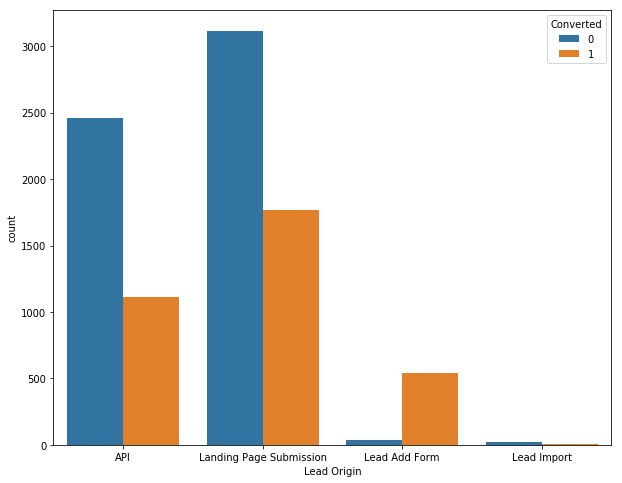

In [52]:
# Lead Origin

plt.figure(figsize=(10,8))
sns.countplot(x="Lead Origin", hue = "Converted", data=lead)
plt.show()


As we can see that "Landing Page Submission" has the highest rate of conversion.

In [53]:
# Lead Source

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
blog                    1
NC_EDM                  1
WeLearn                 1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [54]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'],'Google')

In [55]:
lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
blog                    1
NC_EDM                  1
WeLearn                 1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

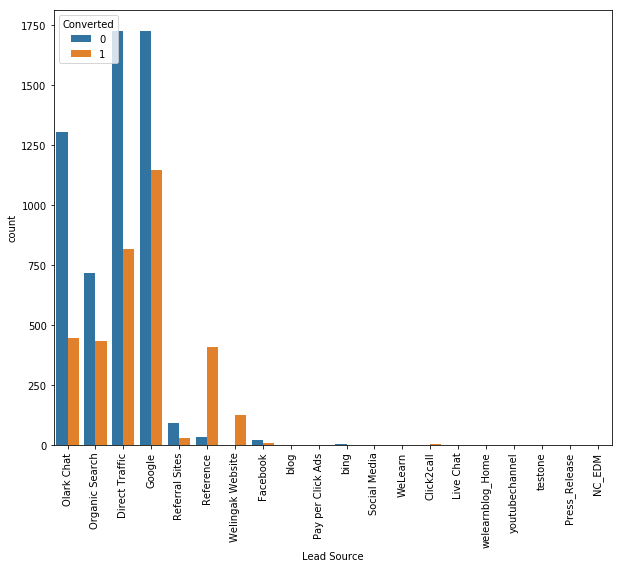

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x="Lead Source", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

"Google" has the highest conversion rate.

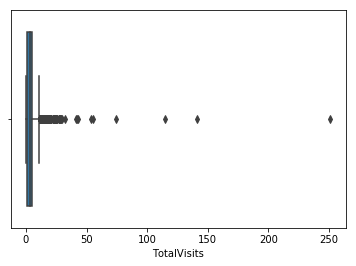

In [57]:
# TotalVisits

sns.boxplot(lead['TotalVisits'])
plt.show()


Their are some outliers in TotalVisits. Let's remove outliers first.

In [58]:
Q1=lead.TotalVisits.quantile(0.05)
Q3=lead.TotalVisits.quantile(0.95)
IQR=Q3-Q1
lead = lead[(lead.TotalVisits>=Q1)&(lead.TotalVisits<=Q3)]


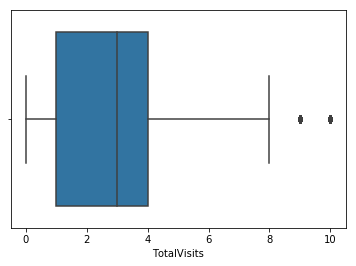

In [59]:
sns.boxplot(lead['TotalVisits'])
plt.show()

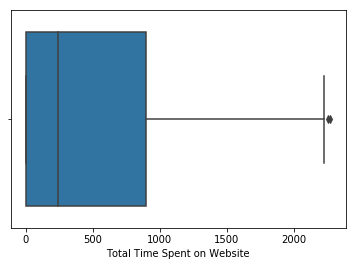

In [60]:
# Total Time Spent on Website

sns.boxplot(lead['Total Time Spent on Website'])
plt.show()

Their are no such outliers in "Total Time Spent on Website".

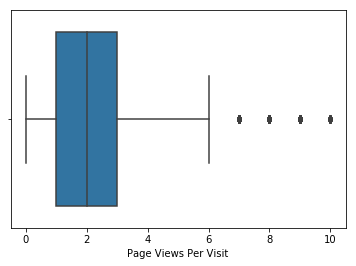

In [61]:
# Page Views Per Visit

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Their are no such outliers in "Page Views Per Visit".

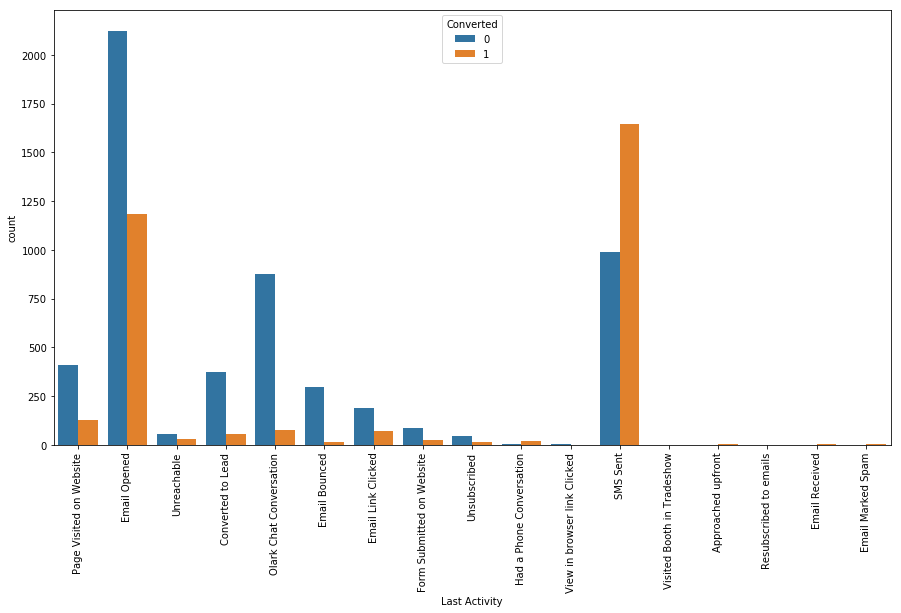

In [62]:
# Last Activity

plt.figure(figsize=(15,8))
sns.countplot(x="Last Activity", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

In [63]:
# Country

lead['Country'].value_counts()

India                   8445
United States             66
United Arab Emirates      52
Singapore                 24
Saudi Arabia              20
Australia                 13
United Kingdom            13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     5
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
unknown                    4
South Africa               3
Ghana                      2
Italy                      2
Sweden                     2
Philippines                2
Netherlands                2
Belgium                    2
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Uganda                     2
Vietnam                    1
Liberia                    1
Kenya                      1
Indonesia                  1
Switzerland                1
Denmark                    1
Sri Lanka     

Almost 90% values are "India". 

In [64]:
# Specialization

lead['Specialization'].value_counts()

Other Specialization                 3224
Finance Management                    919
Marketing Management                  796
Human Resource Management             795
Operations Management                 485
Business Administration               380
IT Projects Management                349
Supply Chain Management               325
Banking, Investment And Insurance     313
Media and Advertising                 187
Travel and Tourism                    180
International Business                169
Healthcare Management                 142
Hospitality Management                106
E-COMMERCE                            104
Retail Management                      92
Rural and Agribusiness                 64
E-Business                             55
Services Excellence                    36
Name: Specialization, dtype: int64

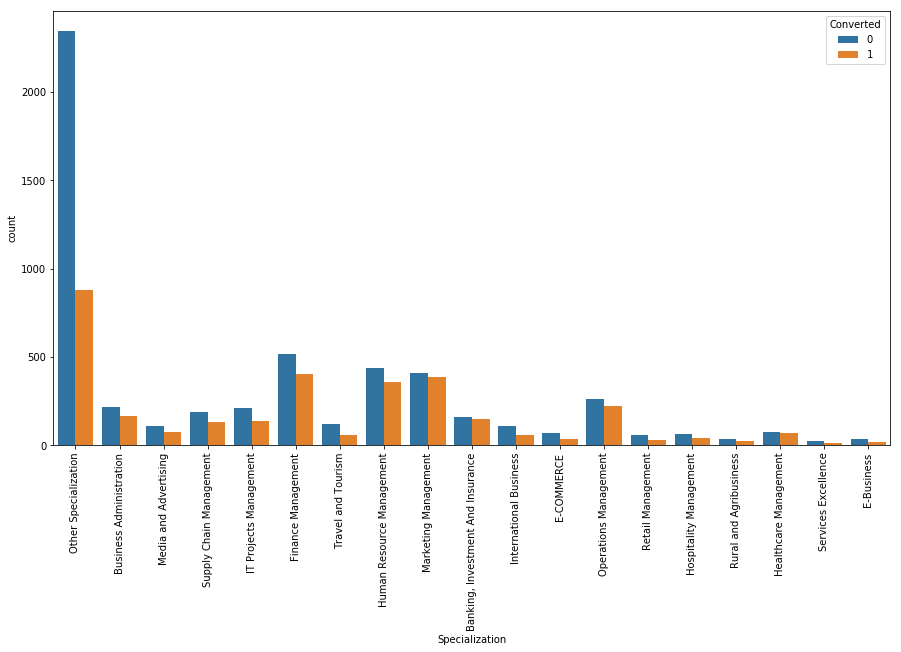

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(x="Specialization", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

In [66]:
# What is your current occupation

lead['What is your current occupation'].value_counts()

Unemployed              7843
Working Professional     648
Student                  202
Other                     13
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

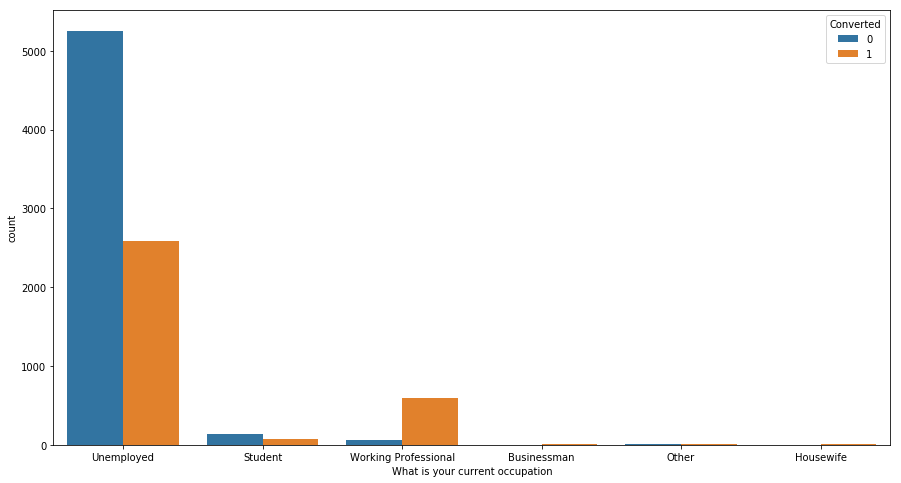

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(x="What is your current occupation", hue = "Converted", data=lead)
plt.show()

Unemoloyed has the highest conversion rate.

In [68]:
# Tags

lead['Tags'].value_counts()

Will revert after reading the email                  5155
Ringing                                              1132
Interested in other courses                           492
Already a student                                     453
Closed by Horizzon                                    271
switched off                                          233
Busy                                                  175
Lost to EINS                                          164
Not doing further education                           136
Interested  in full time MBA                          113
Graduation in progress                                106
invalid number                                         80
Diploma holder (Not Eligible)                          62
wrong number given                                     44
opp hangup                                             32
number not provided                                    25
in touch with EINS                                     12
Lost to Others

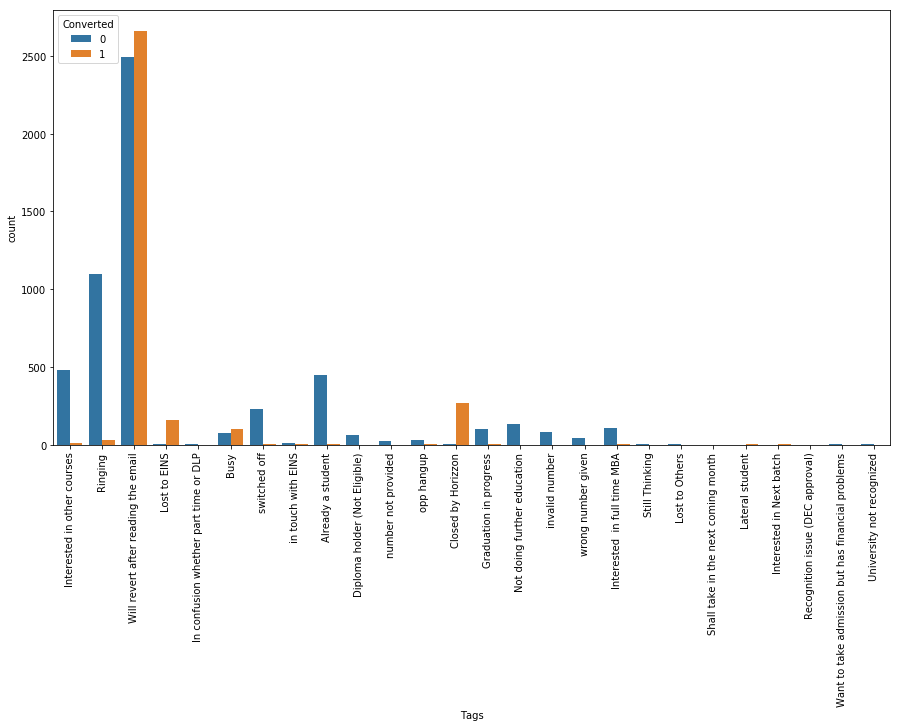

In [69]:
plt.figure(figsize=(15,8))
sns.countplot(x="Tags", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

"Will revert after reading the email" has highest conversion rate among them.

In [70]:
# Lead Quality

lead['Lead Quality'].value_counts()

Not Sure             5597
Might be             1446
Worst                 582
High in Relevance     562
Low in Relevance      534
Name: Lead Quality, dtype: int64

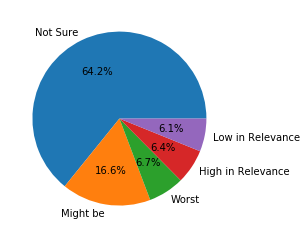

In [73]:
plt.pie(lead['Lead Quality'].value_counts(),labels=['Not Sure', 'Might be', 'Worst', 'High in Relevance',
                                                    'Low in Relevance'],autopct='%1.1f%%')
plt.show()

Maximum value is "Not Sure". So nothing can be interprete from this.

In [74]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [75]:
# City

lead['City'].value_counts()

Mumbai                         6519
Thane & Outskirts               697
Other Cities                    647
Other Cities of Maharashtra     432
Other Metro Cities              356
Tier II Cities                   70
Name: City, dtype: int64

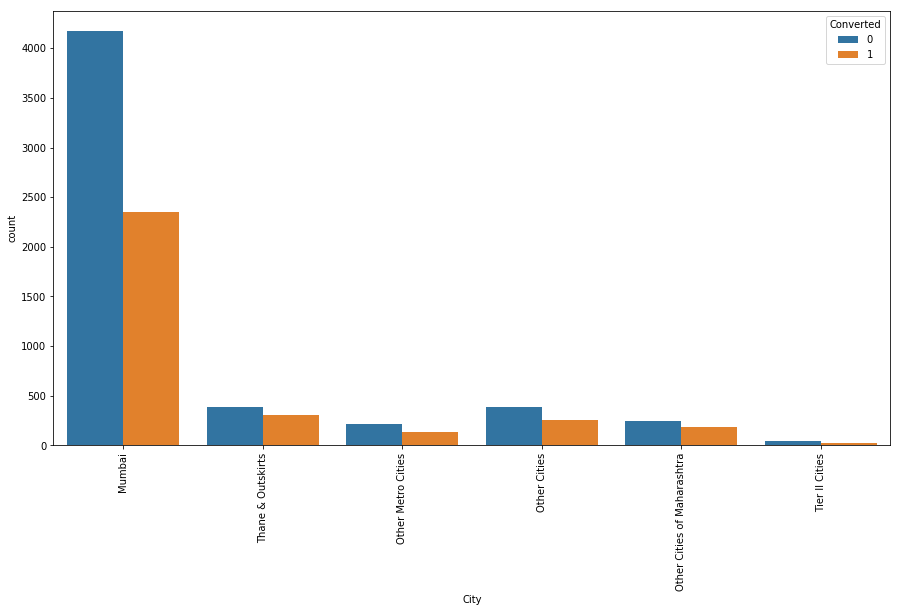

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(x="City", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

"Mumbai" has the maximum conversion rate.

In [77]:
# Last Notable Activity

lead['Last Notable Activity'].value_counts()

Modified                        3179
Email Opened                    2717
SMS Sent                        2086
Page Visited on Website          246
Olark Chat Conversation          175
Email Link Clicked               165
Email Bounced                     59
Unsubscribed                      44
Unreachable                       32
Had a Phone Conversation          11
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

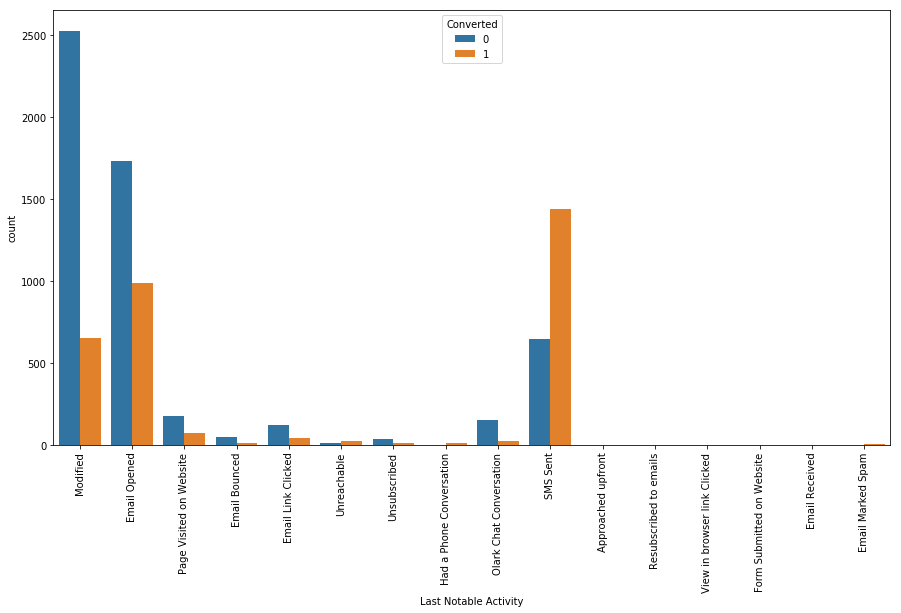

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(x="Last Notable Activity", hue = "Converted", data=lead)
xticks(rotation = 90)
plt.show()

"SMS Sent" medium has the highest conversion rate.

Some columns is not giving relevant information by visulization. Let's drop them.

ValueError: Could not interpret input 'Do Not call'

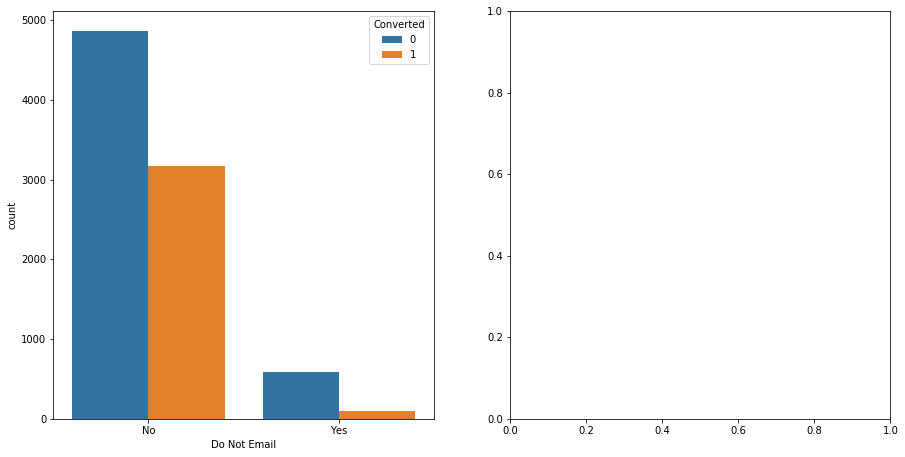

In [87]:
fig,axs=plt.subplots(1,2,figsize=(15,7.5))
sns.countplot(x="Do Not Email", hue = "Converted", data=lead,ax=axs[0])
sns.countplot(x="Do Not call", hue = "Converted", data=lead,ax=axs[1])

In [79]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
lead_df = lead.drop(['Country', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'What matters most to you in choosing a course'],axis =1)

In [81]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Modified


In [76]:
lead_df.shape

(8721, 16)

In [77]:
lead.shape

(8721, 31)

# Step 2 - Data Preparation

In [78]:
# Convert yes/no to 1/0

lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, "No": 0})
lead_df['Do Not Call'] = lead_df['Do Not Call'].map({'Yes': 1, "No": 0})

In [79]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Modified


In [80]:
lead_df = pd.concat([lead_df, lead['City']], axis=1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Modified,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Email Opened,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Modified,Mumbai


In [104]:
# Let's put 'Other' on those values whose are not giving us information by Visualization

# Lead Source

lead_df['Lead Source']  = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                         'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
                                                         'youtubechannel'], 'Others_Source')

In [105]:
# Last Activity

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                            'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails',
                                                            'Email Received', 'Email Marked Spam'], 'Others_Activity')

In [106]:
# "Specialization" and "What is your current occupation"

lead_df['Specialization'] = lead_df['Specialization'].replace(['Others'], 'Other_Specialization')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Other'], 'Other_Occupation')

In [107]:
# Tags

lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                                          'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup',
                                          'Still Thinking', 'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

### Dummy Variable Creation

In [108]:
# Create dummy variable with drop_first argument

dummy_var = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'
                                   , 'Tags', 'Lead Quality', 'Last Notable Activity',
                                   'City']], drop_first = True)

In [109]:
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Concat these dummy variable to original dataframe

lead_df1 = pd.concat([lead_df, dummy_var], axis = 1)
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
lead_df1.shape

(8721, 97)

In [112]:
# Drop the original one

lead_df1 = lead_df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'
                                   , 'Tags', 'Lead Quality', 'Last Notable Activity',
                                   'City'], axis = 1)

In [113]:
lead_df1.shape

(8721, 88)

In [114]:
lead_df1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Data splitation train-test

In [115]:
# Drop Prospect Id and Lead Number for creating the model

lead_df1 = lead_df1.drop(['Prospect ID', 'Lead Number'], axis = 1)
lead_df1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Standardization

In [116]:
scaler = StandardScaler()

lead_df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(lead_df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

lead_df1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.844233,0.370418,0.127105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.371245,1.952760,-0.133002,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.776405,-0.310100,-0.653216,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,-0.371245,1.760961,-0.653216,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X = lead_df1
X.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.844233,0.370418,0.127105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.371245,1.952760,-0.133002,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.776405,-0.310100,-0.653216,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,-0.371245,1.760961,-0.653216,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Assign target variable 'Converted' to y

y = X['Converted']

In [119]:
X = X.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.844233,0.370418,0.127105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-0.371245,1.952760,-0.133002,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.776405,-0.310100,-0.653216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-0.371245,1.760961,-0.653216,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [121]:
# Split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [122]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7220,0,0,0.439074,2.089232,0.907426,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3383,0,0,0.033914,0.232101,0.387212,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
770,0,0,0.439074,-0.241864,0.907426,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5785,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5252,0,0,1.249392,-0.461326,-0.133002,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [123]:
y_train.head()

7220    1
3383    0
770     0
5785    1
5252    1
Name: Converted, dtype: int64

In [124]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1105,0,0,1.654552,-0.599643,0.647319,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5872,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
480,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8055,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8214,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y_test.head()

1105    0
5872    1
480     0
8055    1
8214    0
Name: Converted, dtype: int64

In [126]:
X_train.shape

(6104, 85)

In [127]:
X_test.shape

(2617, 85)

In [128]:
# Checking Churn rate

converted = (sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
converted

37.495700034399725

### Running our First Training Model

In [129]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6018
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1234.6
Date:                Wed, 13 Nov 2019   Deviance:                       2469.3
Time:                        10:57:05   Pearson chi2:                 2.56e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.9130   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.4202      0.321     -4.418      0.000      -2.050      -0.790
Do Not Call                                             23.9969   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                              0.1620      0.089      1.815      0.070      -0.013       0.337
Total Time Spent on Website                              1.0502      0.063     16.772      0.000       0.927       1.173
Page Views Per Visit                                    -0.1735      0.097     -1.794      0.073      -0.363       0.016
Lead Origin_Landing Page Submission                     -0.7663      0.219     -3.494      0.000      -1.196      -0.336
Lead Origin_Lead Add Form                               -0.6405      1.448     -0.442      0.658      -3.478       2.197
Lead Origin_Lead Import                                 29.5840   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -28.7493   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.1266      0.160      0.789      0.430      -0.188       0.441
Lead Source_Olark Chat                                   0.9282      0.237      3.912      0.000       0.463       1.393
Lead Source_Organic Search                               0.2450      0.211      1.163      0.245      -0.168       0.658
Lead Source_Others_Source                                1.1856      0.878      1.350      0.177      -0.536       2.907
Lead Source_Reference                                    2.2170      1.504      1.474      0.140      -0.731       5.165
Lead Source_Referral Sites                              -0.0133      0.472     -0.028      0.978      -0.939       0.912
Lead Source_Welingak Website                             6.2807      1.777      3.534      0.000       2.798       9.764
Last Activity_Email Bounced                             -0.7598      0.951     -0.799      0.424      -2.624       1.105
Last Activity_Email Link Clicked                         0.3510      0.694      0.506      0.613      -1.008       1.710
Last Activity_Email Opened                               0.1863      0.388      0.481      0.631      -0.573       0.946
Last Activity_Form Submitted on Website                  0.3403      0.577      0.590      0.555      -0.790       1.471
Last Activity_Olark Chat Conversation                   -0.3982      0.394     -1.011      0.312      -1.170       0.374
Last Activity_Others_Activity                            0.7638      1.197      0.638      0.523      -1.582       3.109
Last Activity_Pa

### Feature Selection using RFE

In [131]:
logreg = LogisticRegression()

In [132]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [133]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False])

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Others_Source', False, 31),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 67),
 ('Last Activity_Email Opened', False, 52),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others_Activity', False, 16),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last Activity_

In [135]:
col = X_train.columns[rfe.support_]

In [136]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others_Source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Others_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manage

### Assessing the model with StatsModels

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1514.0
Date:                Wed, 13 Nov 2019   Deviance:                       3027.9
Time:                        11:14:27   Pearson chi2:                 2.42e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8042      0.211     -8.534      0.000      -2.219      -1.390
Do Not Email                                            -1.3124      0.216     -6.065      0.000      -1.736      -0.888
Lead Origin_Lead Add Form                                0.8927      0.369      2.422      0.015       0.170       1.615
Lead Source_Welingak Website                             4.0584      1.085      3.741      0.000       1.932       6.185
What is your current occupation_Working Professional     1.1507      0.278      4.134      0.000       0.605       1.696
Tags_Busy                                                4.0684      0.334     12.177      0.000       3.414       4.723
Tags_Closed by Horizzon                                  8.4251      1.042      8.085      0.000       6.383      10.468
Tags_Lost to EINS                                        8.5100      0.633     13.441      0.000       7.269       9.751
Tags_Ringing                                            -1.6918      0.331     -5.109      0.000      -2.341      -1.043
Tags_Will revert after reading the email                 3.6908      0.228     16.186      0.000       3.244       4.138
Tags_invalid number                                     -1.9831      1.156     -1.716      0.086      -4.249       0.282
Tags_switched off                                       -3.0261      0.778     -3.889      0.000      -4.551      -1.501
Tags_wrong number given                                -21.9437    1.8e+04     -0.001      0.999   -3.54e+04    3.53e+04
Lead Quality_Not Sure                                   -3.4320      0.132    -26.010      0.000      -3.691      -3.173
Lead Quality_Worst                                      -3.8631      0.797     -4.850      0.000      -5.424      -2.302
Last Notable Activity_SMS Sent                           2.7950      0.123     22.666      0.000       2.553       3.037
========================================================================================================================
"""

In [138]:
# Drop "Tags_wrong number given" column

col_1 = col.drop('Tags_wrong number given', 1)
col_1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [139]:
X_train_sm = sm.add_constant(X_train[col_1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1516.3
Date:                Wed, 13 Nov 2019   Deviance:                       3032.6
Time:                        11:16:41   Pearson chi2:                 2.44e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8733      0.211     -8.871      0.000      -2.287      -1.459
Do Not Email                                            -1.3172      0.216     -6.104      0.000      -1.740      -0.894
Lead Origin_Lead Add Form                                0.9038      0.370      2.445      0.014       0.179       1.628
Lead Source_Welingak Website                             4.0469      1.085      3.729      0.000       1.920       6.174
What is your current occupation_Working Professional     1.1645      0.280      4.164      0.000       0.616       1.713
Tags_Busy                                                4.1452      0.333     12.457      0.000       3.493       4.797
Tags_Closed by Horizzon                                  8.4934      1.042      8.151      0.000       6.451      10.536
Tags_Lost to EINS                                        8.5802      0.633     13.555      0.000       7.340       9.821
Tags_Ringing                                            -1.6108      0.330     -4.886      0.000      -2.257      -0.965
Tags_Will revert after reading the email                 3.7633      0.227     16.572      0.000       3.318       4.208
Tags_invalid number                                     -1.9004      1.155     -1.645      0.100      -4.165       0.364
Tags_switched off                                       -2.9439      0.777     -3.787      0.000      -4.468      -1.420
Lead Quality_Not Sure                                   -3.4334      0.132    -26.035      0.000      -3.692      -3.175
Lead Quality_Worst                                      -3.8601      0.798     -4.839      0.000      -5.423      -2.297
Last Notable Activity_SMS Sent                           2.7808      0.123     22.682      0.000       2.541       3.021
========================================================================================================================
"""

In [140]:
# Drop "Tags_invalid number" column

col_2 = col_1.drop('Tags_invalid number')
col_2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [141]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1518.1
Date:                Wed, 13 Nov 2019   Deviance:                       3036.2
Time:                        11:18:47   Pearson chi2:                 2.44e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9539      0.211     -9.274      0.000      -2.367      -1.541
Do Not Email                                            -1.3150      0.215     -6.106      0.000      -1.737      -0.893
Lead Origin_Lead Add Form                                0.9184      0.371      2.477      0.013       0.192       1.645
Lead Source_Welingak Website                             4.0304      1.086      3.712      0.000       1.903       6.158
What is your current occupation_Working Professional     1.1813      0.281      4.203      0.000       0.630       1.732
Tags_Busy                                                4.2337      0.331     12.793      0.000       3.585       4.882
Tags_Closed by Horizzon                                  8.5736      1.042      8.229      0.000       6.532      10.616
Tags_Lost to EINS                                        8.6738      0.633     13.699      0.000       7.433       9.915
Tags_Ringing                                            -1.5122      0.327     -4.620      0.000      -2.154      -0.871
Tags_Will revert after reading the email                 3.8461      0.226     17.024      0.000       3.403       4.289
Tags_switched off                                       -2.8432      0.776     -3.663      0.000      -4.365      -1.322
Lead Quality_Not Sure                                   -3.4320      0.132    -26.043      0.000      -3.690      -3.174
Lead Quality_Worst                                      -3.9863      0.785     -5.081      0.000      -5.524      -2.449
Last Notable Activity_SMS Sent                           2.7582      0.121     22.719      0.000       2.520       2.996
========================================================================================================================
"""

In [142]:
# Predict y value on y_train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7220    0.869010
3383    0.771785
770     0.771785
5785    0.998831
5252    0.832857
9123    0.001009
226     0.176567
6352    0.000706
653     0.004560
2010    0.943248
dtype: float64

In [143]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.69009553e-01, 7.71785379e-01, 7.71785379e-01, 9.98830638e-01,
       8.32856592e-01, 1.00874357e-03, 1.76567143e-01, 7.06001678e-04,
       4.55990767e-03, 9.43247518e-01])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [144]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.869010,7220
1,0,0.771785,3383
2,0,0.771785,770
3,1,0.998831,5785
4,1,0.832857,5252


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.869010,7220,1
1,0,0.771785,3383,1
2,0,0.771785,770,1
3,1,0.998831,5785,1
4,1,0.832857,5252,1


In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3670  139]
 [ 339 1956]]


In [148]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9216906946264745


Confusion matrix shows 92.16% accuaracy.

#### Checking VIFs

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,2.98
8,Tags_Will revert after reading the email,2.97
1,Lead Origin_Lead Add Form,1.60
7,Tags_Ringing,1.57
14,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.34
3,What is your current occupation_Working Profes...,1.28
5,Tags_Closed by Horizzon,1.16
0,Do Not Email,1.12
4,Tags_Busy,1.11


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Metrics beyond simply accuracy

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8522875816993464

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635074822788133

In [154]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03649251772118666


In [155]:
# positive predictive value 
print (TP / float(TP+FP))

0.9336515513126492


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9154402594163132


##  Plotting the ROC Curve

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

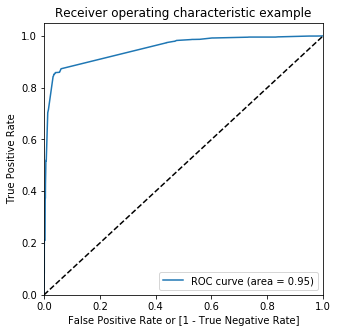

In [159]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [160]:
# Let's create the columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.869010,7220,1,1,1,1,1,1,1,1,1,1,0
1,0,0.771785,3383,1,1,1,1,1,1,1,1,1,0,0
2,0,0.771785,770,1,1,1,1,1,1,1,1,1,0,0
3,1,0.998831,5785,1,1,1,1,1,1,1,1,1,1,1
4,1,0.832857,5252,1,1,1,1,1,1,1,1,1,1,0


In [164]:
# Accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.375983,1.000000,0.000000
0.1,0.1,0.699377,0.979521,0.530585
0.2,0.2,0.914318,0.873203,0.939092
0.3,0.3,0.913172,0.859695,0.945392
0.4,0.4,0.921363,0.857081,0.960095
0.5,0.5,0.921691,0.852288,0.963507
0.6,0.6,0.922182,0.851416,0.964820
0.7,0.7,0.920872,0.843137,0.967708
0.8,0.8,0.884174,0.718519,0.983985
0.9,0.9,0.813401,0.516340,0.992386


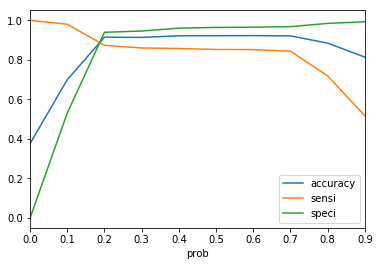

In [165]:
# plot between accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.2 is the optimum point.

In [166]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.869010,7220,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.771785,3383,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.771785,770,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.998831,5785,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.832857,5252,1,1,1,1,1,1,1,1,1,1,0,1


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9143184796854522

In [168]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3577,  232],
       [ 291, 2004]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.873202614379085

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.939091625098451

In [173]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06090837490154896


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8962432915921288


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9247673216132368


### Assigning lead_score to the leads between 0-100

In [176]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.869010,7220,1,1,1,1,1,1,1,1,1,1,0,1,87
1,0,0.771785,3383,1,1,1,1,1,1,1,1,1,0,0,1,77
2,0,0.771785,770,1,1,1,1,1,1,1,1,1,0,0,1,77
3,1,0.998831,5785,1,1,1,1,1,1,1,1,1,1,1,1,100
4,1,0.832857,5252,1,1,1,1,1,1,1,1,1,1,0,1,83


### Precision and Recall

In [178]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3670,  139],
       [ 339, 1956]], dtype=int64)

In [179]:
# Precision (TP / TP + FP)

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9336515513126492

In [180]:
# Recall (TP / TP + FN)

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8522875816993464

In [182]:
# Precision Score using sklearn

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9336515513126492

In [184]:
# Recall score using sklearn

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8522875816993464

### Precision and recall tradeoff

In [186]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      1
 18      1
 19      1
 20      1
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 6074    1
 6075    0
 6076    0
 6077    1
 6078    1
 6079    0
 6080    1
 6081    0
 6082    0
 6083    0
 6084    1
 6085    0
 6086    1
 6087    0
 6088    1
 6089    1
 6090    1
 6091    0
 6092    1
 6093    1
 6094    1
 6095    0
 6096    0
 6097    1
 6098    0
 6099    0
 6100    0
 6101    0
 6102    0
 6103    1
 Name: Converted, Length: 6104, dtype: int64, 0       1
 1       1
 2       1
 3       1
 4       1
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      0
 16      1
 17      1
 18      1
 19      1
 20      1
 21      0
 22      0
 23      0
 24      0
 25      

In [187]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

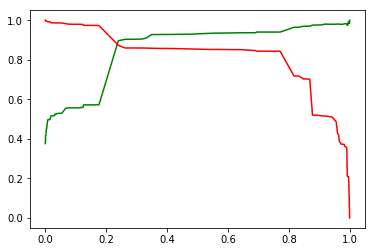

In [188]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [189]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1105,0,0,1.654552,-0.599643,0.647319,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5872,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
480,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8055,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8214,0,0,-1.181564,-0.872588,-1.173430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
X_test = X_test[col_2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
1105,0,0,0,0,0,0,0,0,1,0,1,0,0
5872,0,1,1,0,0,0,0,0,1,0,1,0,1
480,0,0,0,0,0,0,0,0,1,0,1,0,0
8055,0,1,0,1,0,0,0,0,1,0,0,0,1
8214,0,0,0,0,0,0,0,0,1,0,1,0,0


In [191]:
X_test_sm = sm.add_constant(X_test)

In [192]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [193]:
y_test_pred[:10]

1105    0.176567
5872    0.997907
480     0.176567
8055    0.998831
8214    0.176567
4641    0.124132
5693    0.002625
3810    0.869010
430     0.869010
2085    0.967984
dtype: float64

In [194]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [195]:
# Let's see the head
y_pred_1.head()

,0
1105,0.176567
5872,0.997907
480,0.176567
8055,0.998831
8214,0.176567


In [196]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [197]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [198]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [199]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [200]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1105,0.176567
1,1,5872,0.997907
2,0,480,0.176567
3,1,8055,0.998831
4,0,8214,0.176567


In [201]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [202]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [203]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,1105,0,0.176567
1,5872,1,0.997907
2,480,0,0.176567
3,8055,1,0.998831
4,8214,0,0.176567


In [205]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [206]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,1105,0,0.176567,0
1,5872,1,0.997907,1
2,480,0,0.176567,0
3,8055,1,0.998831,1
4,8214,0,0.176567,0


In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.903706534199465

In [208]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1526,  116],
       [ 136,  839]], dtype=int64)

In [209]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8605128205128205

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.9293544457978076

In [212]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7220,0,0,0.439074,2.089232,0.907426,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3383,0,0,0.033914,0.232101,0.387212,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
770,0,0,0.439074,-0.241864,0.907426,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5785,0,0,-1.181564,-0.872588,-1.173430,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5252,0,0,1.249392,-0.461326,-0.133002,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [213]:
X_train_1 = X_train[col_2]
X_train_1.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
7220,0,0,0,0,0,0,0,0,1,0,0,0,0
3383,0,0,0,0,0,0,0,0,1,0,1,0,1
770,0,0,0,0,0,0,0,0,1,0,1,0,1
5785,0,1,0,1,0,0,0,0,1,0,0,0,1
5252,0,0,0,0,1,0,0,0,0,0,1,0,1


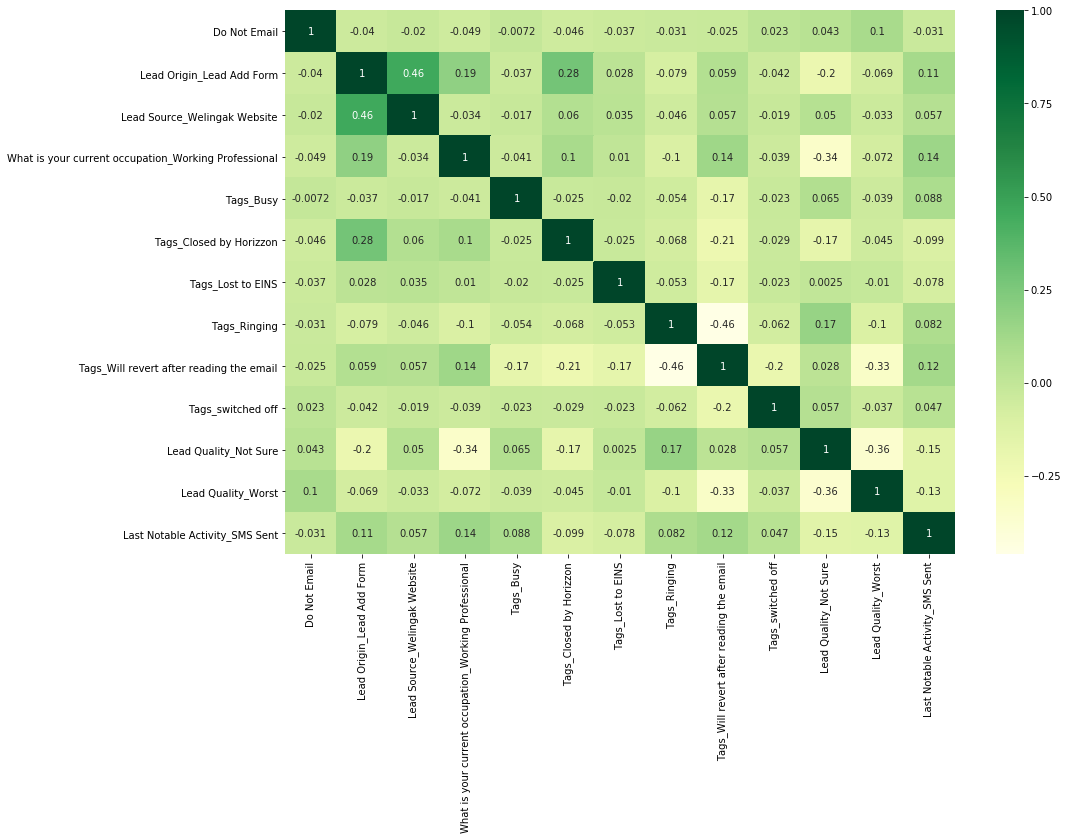

In [215]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(15,10))
sns.heatmap(X_train_1[X_train_1.columns].corr(), annot=True,cmap="YlGn")

In [216]:
X_train_1 = X_train_1.pop('Lead Source_Welingak Website')

In [219]:
X_train_1 = X_train[col_2]
X_train_1.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
7220,0,0,0,0,0,0,0,0,1,0,0,0,0
3383,0,0,0,0,0,0,0,0,1,0,1,0,1
770,0,0,0,0,0,0,0,0,1,0,1,0,1
5785,0,1,0,1,0,0,0,0,1,0,0,0,1
5252,0,0,0,0,1,0,0,0,0,0,1,0,1


In [220]:
X_train_2 = X_train_1.pop('Lead Source_Welingak Website')

In [221]:
X_train_1.head()

,Do Not Email,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
7220,0,0,0,0,0,0,0,1,0,0,0,0
3383,0,0,0,0,0,0,0,1,0,1,0,1
770,0,0,0,0,0,0,0,1,0,1,0,1
5785,0,1,1,0,0,0,0,1,0,0,0,1
5252,0,0,0,1,0,0,0,0,0,1,0,1


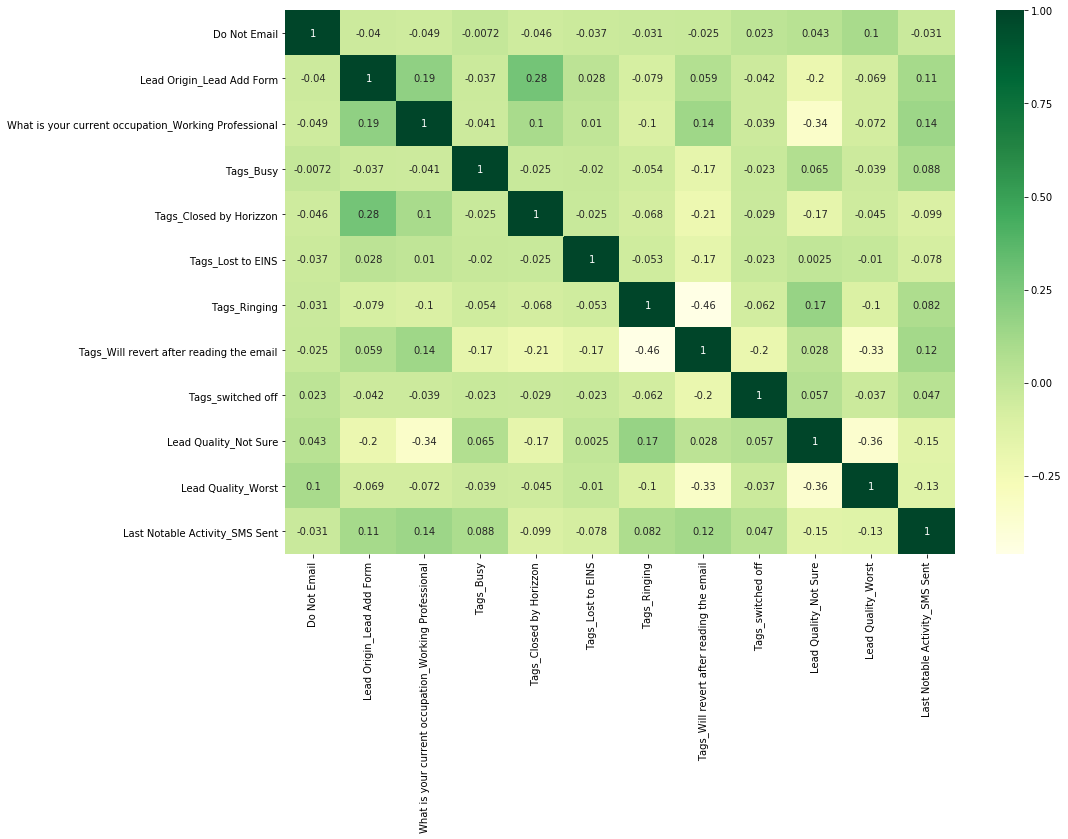

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_1[X_train_1.columns].corr(), annot=True,cmap="YlGn")